# Household Pulse Survey Phase 1 Data Analysis
- UrsaMinor Jupyter Notebook
- 17 November 2020
- By Barnett Yang

## Goals
- Analyze reductions in income and increase in poverty by race due to the COVID-19 pandemic.
- Relate such correlations to reductions in academic performance by race and income.

## Indicators and Relevant Variables

### Demographics
- RHISPANIC: Hispanic Origin
    - 1: No, not of Hispanic, Latino, or Spanish origin
    - 2: Yes, of Hispanic, Latino, or Spanish origin
- RRACE: Race
    - 1: White, Alone
    - 2: Black, Alone
    - 3: Asian, Alone
    - 4: Any other race alone, or race in combination
- EEDUC: Educational attainment
    - 1: Less than high school
    - 2: Some high school
    - 3: High school graduate or equivalent (e.g. GED)
    - 4: Some college, but degree not received or is in process
    - 5: Associate's degree (e.g. AA, AS)
    - 6: Bachelor's degree (e.g. BA, BS, AB)
    - 7: Graduate degree (e.g. master's, professional, doctorate)

### Income and Economic Prosperity Variables
- WRKLOSS: Recent household job loss
    - 1: Yes
    - 2: No
- EXPCTLOSS: Expected household job loss
    - 1: Yes
    - 2: No
- ANYWORK: Employment status for last 7 days
    - 1: Yes
    - 2: No
- INCOME: Total household income (before taxes, as reported in 2019) (May not be helpful since it reflects 2019 tax levels)
    - 1: Less than 25000
    - 2: 25000 - 34999
    - 3: 35000 - 49999
    - 4: 50000 - 74999
    - 6: 100000 - 149999
    - 7: 150000 - 199999
    - 8: 200000 and above

## Miscellaneous Notes and Libraries
The data can be found at https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Upload Raw Data

### Week 1: April 23 - May 5

In [2]:
week1 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week01_PUF_CSV/pulse2020_puf_01.csv')

### Week 2: May 7 - May 12

In [3]:
week2 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week02_PUF_CSV/pulse2020_puf_02.csv')

### Week 3: May 14 - May 19

In [4]:
week3 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week03_PUF_CSV/pulse2020_puf_03.csv')

### Week 4: May 21 - May 26

In [5]:
week4 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week04_PUF_CSV/pulse2020_puf_04.csv')

### Week 5: May 28 - June 2

In [6]:
week5 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week05_PUF_CSV/pulse2020_puf_05.csv')

### Week 6: June 4 - June 9

In [7]:
week6 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week06_PUF_CSV/pulse2020_puf_06.csv')

### Week 7: June 11 - June 16

In [8]:
week7 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week07_PUF_CSV/pulse2020_puf_07.csv')

### Week 8: June 18 - June 23

In [9]:
week8 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week08_PUF_CSV/pulse2020_puf_08.csv')

### Week 9: June 25 - June 30

In [10]:
week9 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week09_PUF_CSV/pulse2020_puf_09.csv')

### Week 10: July 2 - July 7

In [11]:
week10 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week10_PUF_CSV/pulse2020_puf_10.csv')

### Week 11: July 9 - July 14

In [12]:
week11 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week11_PUF_CSV/pulse2020_puf_11.csv')

### Week 12: July 16 - July 21

In [13]:
week12 = pd.read_csv('../data/Household_Pulse_Survey_Phase_1/HPS_Week12_PUF_CSV/pulse2020_puf_12.csv')

## Constants and Functions, Filter only Relevant Indicators

In [14]:
indicators = ['RHISPANIC', 'RRACE', 'EEDUC', 'WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'INCOME']
work_indicators = ['WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'INCOME']

week1 = week1[indicators]
week2 = week2[indicators]
week3 = week3[indicators]
week4 = week4[indicators]
week5 = week5[indicators]
week6 = week6[indicators]
week7 = week7[indicators]
week8 = week8[indicators]
week9 = week9[indicators]
week10 = week10[indicators]
week11 = week11[indicators]
week12 = week12[indicators]

phase1 = [week1, week2, week3, week4, week5, week6, week7, week8, week9, week10, week11, week12]

# Useful for changing x-axis labels later in the INCOME section
positions = ['WEEK ' + str(i) + ' PERCENT' for i in range(1, 13)]
labels = [i for i in range(1, 13)]

# Useful for changing x-axis labels later in the WRKLOSS section
wrkloss_positions = ['WEEK ' + str(i) + ' WRKLOSS PERCENT' for i in range(1, 13)]

# Useful for changing x-axis labels later in the ANYWORK section
anywork_positions = ['WEEK ' + str(i) + ' ANYWORK PERCENT' for i in range(1, 13)]

## Changes in Employment Status Over the Course of the COVID-19 Pandemic Based on Race

### Hispanic

In [15]:
hispanic_work = pd.DataFrame()

for i in range(len(phase1)):
    week = phase1[i][phase1[i]['RHISPANIC'] == 2]
    
    for indicator in work_indicators:
        week_indicator = week[indicator].value_counts().to_frame()
        num_drop = len([i for i in week_indicator.index if i < 0])
        week_indicator = week_indicator.sort_index().iloc[num_drop:]
        week_indicator['PERCENT'] = week_indicator[indicator] / week_indicator[indicator].sum() * 100
    
        hispanic_work['WEEK ' + str(i + 1) + ' ' + indicator] = week_indicator[indicator]
        hispanic_work['WEEK ' + str(i + 1) + ' ' + indicator + ' PERCENT'] = week_indicator['PERCENT']
    
print(hispanic_work)

   WEEK 1 WRKLOSS  WEEK 1 WRKLOSS PERCENT  WEEK 1 EXPCTLOSS  \
1            2970               49.899194              2676   
2            2982               50.100806              3260   

   WEEK 1 EXPCTLOSS PERCENT  WEEK 1 ANYWORK  WEEK 1 ANYWORK PERCENT  \
1                 45.080863            3363               56.587582   
2                 54.919137            2580               43.412418   

   WEEK 1 INCOME  WEEK 1 INCOME PERCENT  WEEK 2 WRKLOSS  \
1            895              17.341600            1589   
2            691              13.388878            1505   

   WEEK 2 WRKLOSS PERCENT  ...  WEEK 11 INCOME  WEEK 11 INCOME PERCENT  \
1               51.357466  ...            1262               18.005422   
2               48.642534  ...             951               13.568269   

   WEEK 12 WRKLOSS  WEEK 12 WRKLOSS PERCENT  WEEK 12 EXPCTLOSS  \
1             4391                55.087191               3470   
2             3580                44.912809               4486 

### Visualizations

Text(0.5, 1.0, 'Changes in percent Hispanic population with recent employment')

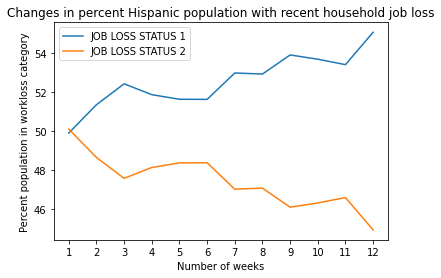

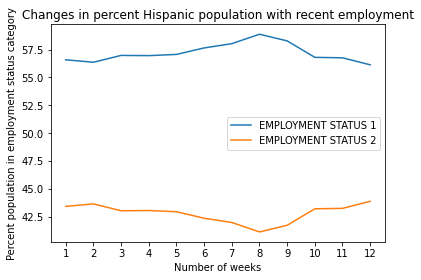

In [16]:
plt.figure(5)

for i in range(2):
    week = hispanic_work.iloc[i].to_frame()
    week = week[week.index.str.contains('WRKLOSS PERCENT')]
    plt.plot(week, label='JOB LOSS STATUS ' + str(i + 1))

plt.xticks(wrkloss_positions, labels)
plt.legend()
plt.xlabel('Number of weeks')
plt.ylabel('Percent population in workloss category')
plt.title('Changes in percent Hispanic population with recent household job loss')


plt.figure(6)

for i in range(2):
    week = hispanic_work.iloc[i].to_frame()
    week = week[week.index.str.contains('ANYWORK PERCENT')]
    plt.plot(week, label='EMPLOYMENT STATUS ' + str(i + 1))

plt.xticks(anywork_positions, labels)
plt.legend()
plt.xlabel('Number of weeks')
plt.ylabel('Percent population in employment status category')
plt.title('Changes in percent Hispanic population with recent employment')

### White

In [17]:
white_work = pd.DataFrame()

for i in range(len(phase1)):
    week = phase1[i][phase1[i]['RRACE'] == 1]
    
    for indicator in work_indicators:
        week_indicator = week[indicator].value_counts().to_frame()
        num_drop = len([i for i in week_indicator.index if i < 0])
        week_indicator = week_indicator.sort_index().iloc[num_drop:]
        week_indicator['PERCENT'] = week_indicator[indicator] / week_indicator[indicator].sum() * 100
    
        white_work['WEEK ' + str(i + 1) + ' ' + indicator] = week_indicator[indicator]
        white_work['WEEK ' + str(i + 1) + ' ' + indicator + ' PERCENT'] = week_indicator['PERCENT']
    
print(white_work)

   WEEK 1 WRKLOSS  WEEK 1 WRKLOSS PERCENT  WEEK 1 EXPCTLOSS  \
1           22744               37.258981             18535   
2           38299               62.741019             42409   

   WEEK 1 EXPCTLOSS PERCENT  WEEK 1 ANYWORK  WEEK 1 ANYWORK PERCENT  \
1                 30.413166           34161               55.997049   
2                 69.586834           26844               44.002951   

   WEEK 1 INCOME  WEEK 1 INCOME PERCENT  WEEK 2 WRKLOSS  \
1           5612              10.212735           13206   
2           4777               8.693199           21895   

   WEEK 2 WRKLOSS PERCENT  ...  WEEK 11 INCOME  WEEK 11 INCOME PERCENT  \
1                37.62286  ...            6532                9.841055   
2                62.37714  ...            5843                8.803013   

   WEEK 12 WRKLOSS  WEEK 12 WRKLOSS PERCENT  WEEK 12 EXPCTLOSS  \
1            28230                39.672279              18601   
2            42928                60.327721              52478 

### Visualizations

Text(0.5, 1.0, 'Changes in percent White population with recent employment')

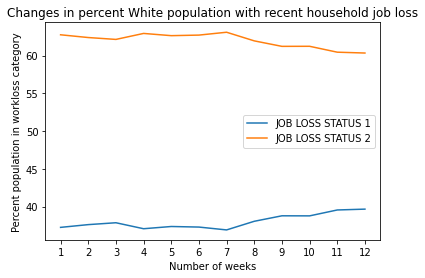

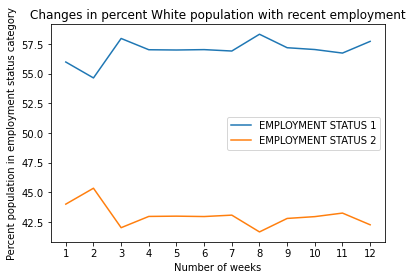

In [18]:
plt.figure(7)

for i in range(2):
    week = white_work.iloc[i].to_frame()
    week = week[week.index.str.contains('WRKLOSS PERCENT')]
    plt.plot(week, label='JOB LOSS STATUS ' + str(i + 1))

plt.xticks(wrkloss_positions, labels)
plt.legend()
plt.xlabel('Number of weeks')
plt.ylabel('Percent population in workloss category')
plt.title('Changes in percent White population with recent household job loss')


plt.figure(8)

for i in range(2):
    week = white_work.iloc[i].to_frame()
    week = week[week.index.str.contains('ANYWORK PERCENT')]
    plt.plot(week, label='EMPLOYMENT STATUS ' + str(i + 1))

plt.xticks(anywork_positions, labels)
plt.legend()
plt.xlabel('Number of weeks')
plt.ylabel('Percent population in employment status category')
plt.title('Changes in percent White population with recent employment')

### Black